#### Import required libraries:

In [55]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import load_img, img_to_array , to_categorical
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

#### Initializing data folders

In [56]:
dir_sp_train = "drawings/spiral/training"
dir_sp_test = "drawings/spiral/testing"
dir_wa_train = "drawings/wave/training"
dir_wa_test = "drawings/wave/testing"

In [57]:
Name = []
for file in os.listdir(dir_sp_train):
    Name+=[file]
print (Name)

['healthy', 'parkinson']


In [58]:
# Mapping image to tag
N = []
for i in range(len(Name)):
    N+=[i]

reverse_mapping = dict(zip(N,Name))

#function for getting 0(healthy) and 1(parkinson)
def mapper(value):
    return reverse_mapping[value]

In [59]:
# Creating training dataset for spiral images 
dataset_sp = []
count = 0
for file in os.listdir(dir_sp_train):
    path = os.path.join(dir_sp_train,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        dataset_sp.append([image,count])
    count+=1

# Creating testing dataset for spiral images 
testset_sp = []
count = 0
for file in os.listdir(dir_sp_test):
    path = os.path.join(dir_sp_test,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        testset_sp.append([image,count])
    count+=1

In [60]:
# Creating training dataset for wave images 
dataset_wa = []
count = 0
for file in os.listdir(dir_wa_train):
    path = os.path.join(dir_wa_train,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        dataset_wa.append([image,count])
    count+=1

# Creating testing dataset for wave images 
testset_wa = []
count = 0
for file in os.listdir(dir_wa_test):
    path = os.path.join(dir_wa_test,file)
    for im in os.listdir(path):
        image = load_img(os.path.join(path,im),grayscale=False,color_mode = 'rgb' ,target_size = (100,100))
        image = img_to_array(image)
        image = image/255.0
        testset_wa.append([image,count])
    count+=1
        

In [61]:
# Spliting image and it's label
data_sp,lables_sp0 = zip(*dataset_sp)
test_sp,tlables_sp0 = zip(*testset_sp)

data_wa,lables_wa0 = zip(*dataset_wa)
test_wa,tlables_wa0 = zip(*testset_wa)

In [62]:
# Converting labels to numerical(binary) for spiral images
lables_sp1 = to_categorical(lables_sp0)
data_sp = np.array(data_sp)
lables_sp = np.array(lables_sp1)

tlables_sp1 = to_categorical(tlables_sp0)
test_sp = np.array(test_sp)
tlables_sp = np.array(tlables_sp1)

In [63]:
# Converting labels to numerical(binary) data for wave images
lables_wa1 = to_categorical(lables_wa0)
data_wa = np.array(data_wa)
lables_wa = np.array(lables_wa1)

tlables_wa1 = to_categorical(tlables_wa0)
test_wa = np.array(test_wa)
tlables_wa = np.array(tlables_wa1)

In [64]:
# Spiliting data into train and validation data
trainx_sp,validx_sp,trainy_sp,validy_sp = train_test_split(data_sp,lables_sp,test_size=0.2,random_state=44)
trainx_wa,validx_wa,trainy_wa,validy_wa = train_test_split(data_wa,lables_wa,test_size=0.2,random_state=44)

In [65]:
# Viewing shape of data of spiral
print(trainx_sp.shape)
print(validx_sp.shape)
print(trainy_sp.shape)
print(validy_sp.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


In [66]:
# Viewing shape of data of wave
print(trainx_wa.shape)
print(validx_wa.shape)
print(trainy_wa.shape)
print(validy_wa.shape)

(57, 100, 100, 3)
(15, 100, 100, 3)
(57, 2)
(15, 2)


### CNN Model:

In [67]:
# CNN Architecture:
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size = (5,5),activation='relu',input_shape=(100,100,3)))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Conv2D(filters=64, kernel_size = (5,5),activation='relu'))
# model.add(MaxPool2D(pool_size=(2,2)))

# model.add(Flatten())
# model.add(Dense(units=64,activation="relu"))
# model.add(Dense(units=2,activation="softmax"))

# model.compile(loss='categorical_crossentropy', optimizer = Adam(learning_rate=0.001), metrics=['accuracy'])

# print("Model Summary")
# model.summary()

In [68]:
# training spiral and wave model:
# epoch = 100
# batch_size = 32

# print("Start Training",'\n')
# hist_0 = model.fit(trainx_sp,trainy_sp,batch_size=batch_size,epochs=epoch,validation_data=(validx_sp, validy_sp))
# hist_1 = model.fit(trainx_wa,trainy_wa,batch_size=batch_size,epochs=epoch,validation_data=(validx_wa, validy_wa))
# print("Training end",'\n')

# model.save("CNN_Model.h5")

### Visualizing accuracy and loss of training and validation dataset:

In [69]:
# for Spiral dataset:
# figure = plt.figure(figsize=(10,10))
# plt.plot(hist_0.history['accuracy'],label= 'Train Accuracy')
# plt.plot(hist_0.history['val_accuracy'],label= 'Test Accuracy')
# plt.title("Model Accuracy for Spiral")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend(loc='upper left')
# plt.show()

# figure2 = plt.figure(figsize=(10,10))
# plt.plot(hist_0.history['loss'],label= 'Train loss')
# plt.plot(hist_0.history['val_loss'],label= 'Test loss')
# plt.title("Model loss for Spiral")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(loc='upper left')
# plt.show()

In [70]:
# for Wave dataset:
# figure = plt.figure(figsize=(10,10))
# plt.plot(hist_1.history['accuracy'],label= 'Train Accuracy')
# plt.plot(hist_1.history['val_accuracy'],label= 'Test Accuracy')
# plt.title("Model Accuracy for Wave")
# plt.xlabel("Epochs")
# plt.ylabel("Accuracy")
# plt.legend(loc='upper left')
# plt.show()

# figure2 = plt.figure(figsize=(10,10))
# plt.plot(hist_1.history['loss'],label= 'Train loss')
# plt.plot(hist_1.history['val_loss'],label= 'Test loss')
# plt.title("Model loss for Wave")
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(loc='upper left')
# plt.show()

### Conclusion of CNN model:
Overfitting occurs because the model cannot generalize and fits too closely to the training dataset. Overfitting happens due to several reasons, here, The training data size is too small and does not contain enough data samples to accurately represent all possible input data values.

In [71]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [72]:
pretrained_model3 = tf.keras.applications.ResNet152(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

pretrained_model4 = tf.keras.applications.ResNet152(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model4.trainable = False

TypeError: 'module' object is not callable

In [73]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128,activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(2,activation='softmax')(x3)
model3 = tf.keras.Model(inputs=inputs3, outputs=outputs3)

inputs4 = pretrained_model4.input
x4 = tf.keras.layers.Dense(128,activation='relu')(pretrained_model4.output)
outputs4 = tf.keras.layers.Dense(2,activation='softmax')(x4)
model4 = tf.keras.Model(inputs=inputs4, outputs=outputs4)

In [74]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [75]:
sp_3=model3.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(validx_sp, validy_sp),epochs=100)
wa_4=model4.fit(datagen.flow(trainx_wa,trainy_wa,batch_size=32),validation_data=(validx_wa, validy_wa),epochs=100)

Epoch 1/100
2/2 [==============================] - 17s 4s/step - loss: 1.4260 - accuracy: 0.4912 - val_loss: 0.9320 - val_accuracy: 0.6000
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 1.1079 - accuracy: 0.3860 - val_loss: 1.2042 - val_accuracy: 0.4000
Epoch 3/100
2/2 [==============================] - 2s 1s/step - loss: 1.0472 - accuracy: 0.5263 - val_loss: 1.0543 - val_accuracy: 0.4000
Epoch 4/100
2/2 [==============================] - 2s 1s/step - loss: 0.7788 - accuracy: 0.5263 - val_loss: 0.6748 - val_accuracy: 0.6000
Epoch 5/100
2/2 [==============================] - 2s 1s/step - loss: 0.8287 - accuracy: 0.4737 - val_loss: 0.7699 - val_accuracy: 0.6000
Epoch 6/100
2/2 [==============================] - 2s 1s/step - loss: 0.8701 - accuracy: 0.4737 - val_loss: 0.6730 - val_accuracy: 0.6000
Epoch 7/100
2/2 [==============================] - 2s 1s/step - loss: 0.7202 - accuracy: 0.4737 - val_loss: 0.8672 - val_accuracy: 0.4000
Epoch 8/100
2/2 [================

In [76]:
y_pred_sp = model3.predict(validx_sp)
pred_sp = np.argmax(y_pred_sp,axis=1)
true_sp = np.argmax(validy_sp,axis=1)
print(classification_report(true_sp,pred_sp))

1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

           0       0.40      1.00      0.57         6
           1       0.00      0.00      0.00         9

    accuracy                           0.40        15
   macro avg       0.20      0.50      0.29        15
weighted avg       0.16      0.40      0.23        15



c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\adity\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [77]:
y_pred_wa = model4.predict(validx_wa)
pred_wa = np.argmax(y_pred_wa,axis=1)
true_wa = np.argmax(validy_wa,axis=1)
print(classification_report(true_wa,pred_wa))

1/1 [==============================] - 4s 4s/step
              precision    recall  f1-score   support

           0       0.50      0.67      0.57         6
           1       0.71      0.56      0.63         9

    accuracy                           0.60        15
   macro avg       0.61      0.61      0.60        15
weighted avg       0.63      0.60      0.60        15



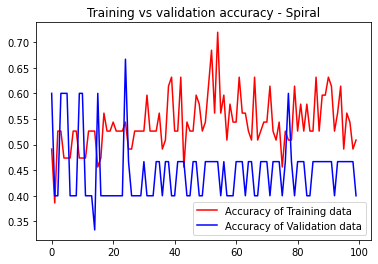

<Figure size 432x288 with 0 Axes>

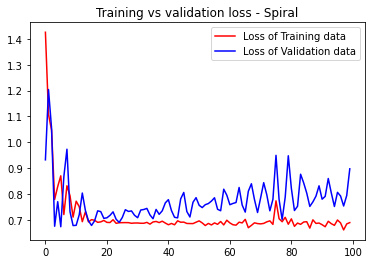

<Figure size 432x288 with 0 Axes>

In [78]:
get_acc3 = sp_3.history['accuracy']
value_acc3 = sp_3.history['val_accuracy']
get_loss3 = sp_3.history['loss']
validation_loss3 = sp_3.history['val_loss']

epochs3 = range(len(get_acc3))
plt.plot(epochs3, get_acc3, 'r',label='Accuracy of Training data')
plt.plot(epochs3, value_acc3, 'b',label='Accuracy of Validation data')
plt.title("Training vs validation accuracy - Spiral")
plt.legend(loc=0)
plt.figure()
plt.show()
epochs3 = range(len(get_loss3))
plt.plot(epochs3, get_loss3, 'r',label='Loss of Training data')
plt.plot(epochs3, validation_loss3, 'b',label='Loss of Validation data')
plt.title("Training vs validation loss - Spiral")
plt.legend(loc=0)
plt.figure()
plt.show()

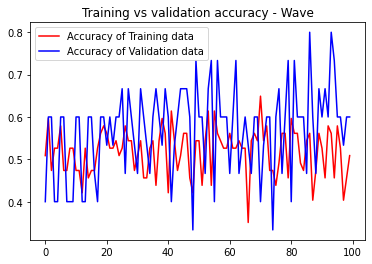

<Figure size 432x288 with 0 Axes>

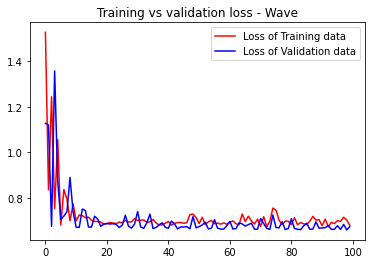

<Figure size 432x288 with 0 Axes>

In [79]:
get_acc4 = wa_4.history['accuracy']
value_acc4 = wa_4.history['val_accuracy']
get_loss4 = wa_4.history['loss']
validation_loss4 = wa_4.history['val_loss']

epochs4 = range(len(get_acc4))
plt.plot(epochs4, get_acc4, 'r',label='Accuracy of Training data')
plt.plot(epochs4, value_acc4, 'b',label='Accuracy of Validation data')
plt.title("Training vs validation accuracy - Wave")
plt.legend(loc=0)
plt.figure()
plt.show()
epochs4 = range(len(get_loss4))
plt.plot(epochs4, get_loss4, 'r',label='Loss of Training data')
plt.plot(epochs4, validation_loss4, 'b',label='Loss of Validation data')
plt.title("Training vs validation loss - Wave")
plt.legend(loc=0)
plt.figure()
plt.show()

In [88]:
pretrained_model5 = tf.keras.applications.InceptionResNetV2(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model5.trainable = False

pretrained_model6 = tf.keras.applications.InceptionResNetV2(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model6.trainable = False

219055592/219055592 [==============================] - 49s 0us/step


In [89]:
inputs5 = pretrained_model5.input
x5 = tf.keras.layers.Dense(128,activation='relu')(pretrained_model5.output)
outputs5 = tf.keras.layers.Dense(2,activation='softmax')(x5)
model5 = tf.keras.Model(inputs=inputs5, outputs=outputs5)

inputs6 = pretrained_model6.input
x6 = tf.keras.layers.Dense(128,activation='relu')(pretrained_model6.output)
outputs6 = tf.keras.layers.Dense(2,activation='softmax')(x6)
model6 = tf.keras.Model(inputs=inputs6, outputs=outputs6)

In [90]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [91]:
sp_5=model5.fit(datagen.flow(trainx_sp,trainy_sp,batch_size=32),validation_data=(validx_sp,validy_sp),epochs=100)
wa_6=model6.fit(datagen.flow(trainx_wa,trainy_wa,batch_size=32),validation_data=(validx_wa,validy_wa),epochs=100)

Epoch 1/100
2/2 [==============================] - 11s 3s/step - loss: 1.7940 - accuracy: 0.4211 - val_loss: 2.0319 - val_accuracy: 0.4000
Epoch 2/100
2/2 [==============================] - 1s 303ms/step - loss: 1.4356 - accuracy: 0.5965 - val_loss: 0.6345 - val_accuracy: 0.6000
Epoch 3/100
2/2 [==============================] - 1s 336ms/step - loss: 0.9328 - accuracy: 0.4737 - val_loss: 0.5277 - val_accuracy: 0.8000
Epoch 4/100
2/2 [==============================] - 1s 472ms/step - loss: 0.6977 - accuracy: 0.5965 - val_loss: 0.6211 - val_accuracy: 0.6667
Epoch 5/100
2/2 [==============================] - 1s 348ms/step - loss: 0.9893 - accuracy: 0.5614 - val_loss: 0.5433 - val_accuracy: 0.7333
Epoch 6/100
2/2 [==============================] - 1s 401ms/step - loss: 0.7137 - accuracy: 0.6140 - val_loss: 0.4087 - val_accuracy: 0.8667
Epoch 7/100
2/2 [==============================] - 1s 344ms/step - loss: 0.6520 - accuracy: 0.6316 - val_loss: 0.3973 - val_accuracy: 0.8667
Epoch 8/100
2/2

In [95]:
y_pred_sp = model5.predict(test_sp)
pred_sp = np.argmax(y_pred_sp,axis=1)
ground_sp = np.argmax(tlables_sp,axis=1)
print(classification_report(ground_sp,pred_sp))

1/1 [==============================] - 0s 225ms/step
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        15
           1       0.67      0.80      0.73        15

    accuracy                           0.70        30
   macro avg       0.71      0.70      0.70        30
weighted avg       0.71      0.70      0.70        30



In [78]:
y_pred_wa = model6.predict(test_wa)
pred_wa = np.argmax(y_pred_wa,axis=1)
ground_wa = np.argmax(tlables_wa,axis=1)
print(classification_report(ground_wa,pred_wa))

1/1 [==============================] - 1s 631ms/step
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        15
           1       0.85      0.73      0.79        15

    accuracy                           0.80        30
   macro avg       0.81      0.80      0.80        30
weighted avg       0.81      0.80      0.80        30



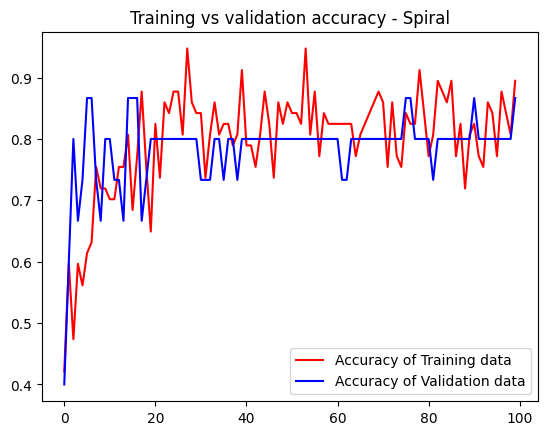

<Figure size 640x480 with 0 Axes>

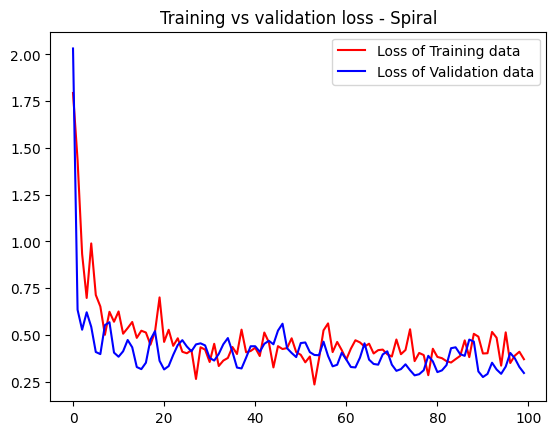

<Figure size 640x480 with 0 Axes>

In [96]:
get_acc5 = sp_5.history['accuracy']
value_acc5 = sp_5.history['val_accuracy']
get_loss5 = sp_5.history['loss']
validation_loss5 = sp_5.history['val_loss']

epochs5 = range(len(get_acc5))
plt.plot(epochs5, get_acc5, 'r',label='Accuracy of Training data')
plt.plot(epochs5, value_acc5, 'b',label='Accuracy of Validation data')
plt.title("Training vs validation accuracy - Spiral")
plt.legend(loc=0)
plt.figure()
plt.show()
epochs5 = range(len(get_loss5))
plt.plot(epochs5, get_loss5, 'r',label='Loss of Training data')
plt.plot(epochs5, validation_loss5, 'b',label='Loss of Validation data')
plt.title("Training vs validation loss - Spiral")
plt.legend(loc=0)
plt.figure()
plt.show()

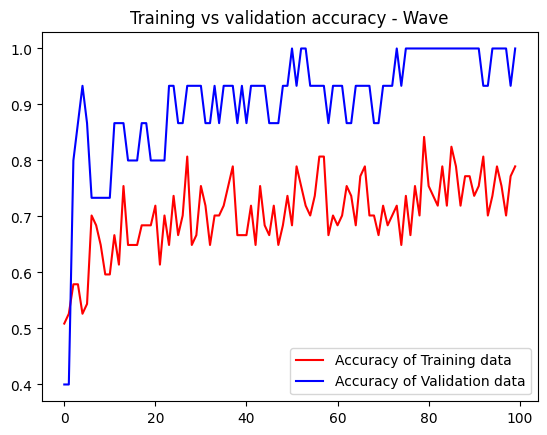

<Figure size 640x480 with 0 Axes>

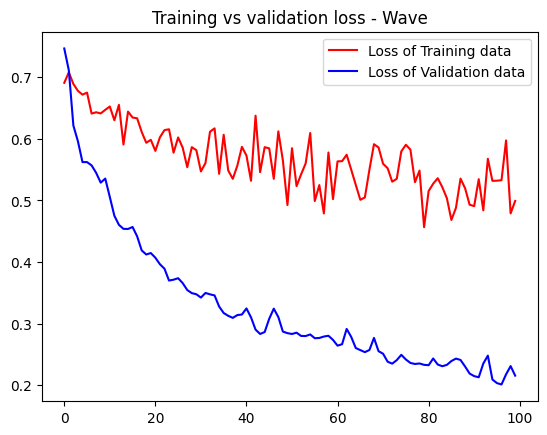

<Figure size 640x480 with 0 Axes>

In [83]:
get_acc6 = wa_6.history['accuracy']
value_acc6 = wa_6.history['val_accuracy']
get_loss6 = wa_6.history['loss']
validation_loss6 = wa_6.history['val_loss']

epochs6 = range(len(get_acc6))
plt.plot(epochs6, get_acc6, 'r',label='Accuracy of Training data')
plt.plot(epochs6, value_acc6, 'b',label='Accuracy of Validation data')
plt.title("Training vs validation accuracy - Wave")
plt.legend(loc=0)
plt.figure()
plt.show()
epochs6 = range(len(get_loss6))
plt.plot(epochs6, get_loss6, 'r',label='Loss of Training data')
plt.plot(epochs6, validation_loss6, 'b',label='Loss of Validation data')
plt.title("Training vs validation loss - Wave")
plt.legend(loc=0)
plt.figure()
plt.show()